# **Sentiment Analysis and Classification of Tweets using Deep Learning Models**

### Importing required modules

In [3]:
# Importing Required Modules for Data Pre-Processing / Visualization
import seaborn as sns
import pandas as pd
import numpy as np
import os
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# Importing Keras Modules
import keras
keras.__version__
from numpy import array
from keras.preprocessing.text import one_hot
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding, SimpleRNN
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
# from keras.layers.merge import Concatenate
from keras.layers import Bidirectional


### **Brief Summary about the people and Reasons for the Interest**


*   Joe Biden and Elon Musk are influential figures who have amassed millions of followers across various demographics. Their followers hold their statements and opinions in high regard, often viewing them as valuable advice for self-improvement.

*   In this context, the social media content they produce reaches not only millions of people in the US, but also individuals around the world.

* This is of particular interest to us, as people tend to be influenced by the opinions of these two individuals when making financial decisions.

* Our project aims to investigate the impact of these two individuals, specifically in the stock market, on the economy.

* Our goal is to analyze the tweets posted by these two individuals over time and determine the overall sentiment expressed by the public towards them.



1. Joe Biden has posted approximately 7.5K tweets. After analyzing his tweets, it was discovered that he has a total of 2,874,090 retweets, averaging about 57,481 retweets per tweet. A word cloud generated from his tweets shows that most of them contain positive language, with a strong emphasis on his concern for the country, as evidenced by frequent mentions of "nation", "US", and "America".

2.  Elon Musk has posted around 21,000 tweets, to date. After analyzing his tweets, it was found that he frequently discusses four key stocks: Bitcoin, Dogecoin, Tesla, and Twitter. Musk is certainly unique in his tweeting style, with most of his posts being controversial and containing a mix of sentiments. Additionally, he has recently faced issues with Twitter, which have gained public attention.


We believed that by selecting both an individual known for their positive tweets and another who tweets with a mix of sentiments, we would obtain a diverse range of tweets with varying emotional tones. Therefore, we chose to analyze the Twitter accounts of both Elon Musk and Joe Biden.

###Downloading the Tweet Scraping Package

In [5]:
! pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 6.6 MB/s eta 0:00:00


### Scraping Joe Biden's most recent 2000 tweets

In [6]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Created a list to append all Tweet attributes(data)
attributes_container = []

# Using TwitterSearchScraper to scrape data and append Tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:joebiden').get_items()):
    if i>2000:
        break
    attributes_container.append([tweet.date, tweet.content])
    
# Creating a dataframe from the Tweets listed above 
tweets_1 = pd.DataFrame(attributes_container, columns=["Date Created", "Tweets"])

<ipython-input-6-0d64d3a75356>:11: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.date, tweet.content])


In [7]:
tweets_1.head() # displaying top 5 Tweets

,Date Created,Tweets
0,2023-03-20 22:46:00+00:00,We are working every day to bring families mor...
1,2023-03-20 19:03:05+00:00,I signed the American Rescue Plan to lower pri...
2,2023-03-19 19:28:05+00:00,More than 12 million jobs have been created si...
3,2023-03-19 15:51:00+00:00,We are focused on getting more people affordab...
4,2023-03-18 22:00:50+00:00,The House Freedom Caucus and I have a very dif...


In [8]:
tweets_1.shape  # We scraped 2001 Tweets and the date created

(2001, 2)

###Scraping Elon Musk's most recent 2000 tweets

In [9]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Created a list to append all Tweet attributes(data)
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:elonmusk').get_items()):
    if i>2000:
        break
    attributes_container.append([tweet.date, tweet.content])
    
# Creating a dataframe from the Tweets list above 
tweets_2 = pd.DataFrame(attributes_container, columns=["Date Created", "Tweets"])

<ipython-input-9-0b71982d78e8>:11: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.date, tweet.content])


In [10]:
tweets_2.head() # displaying the top 5 Tweets

,Date Created,Tweets
0,2023-03-21 01:41:10+00:00,Follow @HelpfulNotes to read highly rated @Com...
1,2023-03-21 00:57:41+00:00,@unusual_whales Absolutely required to stop ba...
2,2023-03-21 00:17:36+00:00,@BillAckman @federalreserve Fed needs to drop ...
3,2023-03-20 23:21:30+00:00,@TheBabylonBee Insane that it remains zero aft...
4,2023-03-20 23:19:40+00:00,@simplydt @TrungTPhan @Twitter And making it m...


In [11]:
tweets_2.shape # we scraped 2001 Tweets with the date created

(2001, 2)

### Concatenating both individuals' Tweets into a Single Dataframe

In [12]:
tweets_final=pd.concat([tweets_1,tweets_2],axis=0)

In [13]:
tweets_final.shape # Checking if concatenating was successful

(4002, 2)

In [14]:
tweets_final.tail() # Checking indices

,Date Created,Tweets
1996,2022-12-24 11:55:24+00:00,… is what it feels like understanding how Twit...
1997,2022-12-24 11:51:04+00:00,@ggreenwald No special treatment for corpo jou...
1998,2022-12-24 11:47:17+00:00,Fractal of Rube Goldberg machines …
1999,2022-12-24 07:56:31+00:00,"@Spiro_Ghost I was invited to WEF, but declined"
2000,2022-12-24 07:21:29+00:00,@WallStreetSilv Damn


In [15]:
tweets_final=tweets_final.reset_index() # Resetting indices
tweets_final

,index,Date Created,Tweets
0,0,2023-03-20 22:46:00+00:00,We are working every day to bring families mor...
1,1,2023-03-20 19:03:05+00:00,I signed the American Rescue Plan to lower pri...
2,2,2023-03-19 19:28:05+00:00,More than 12 million jobs have been created si...
3,3,2023-03-19 15:51:00+00:00,We are focused on getting more people affordab...
4,4,2023-03-18 22:00:50+00:00,The House Freedom Caucus and I have a very dif...
...,...,...,...
3997,1996,2022-12-24 11:55:24+00:00,… is what it feels like understanding how Twit...
3998,1997,2022-12-24 11:51:04+00:00,@ggreenwald No special treatment for corpo jou...
3999,1998,2022-12-24 11:47:17+00:00,Fractal of Rube Goldberg machines …
4000,1999,2022-12-24 07:56:31+00:00,"@Spiro_Ghost I was invited to WEF, but declined"


In [16]:
tweets_final.drop(['index'],axis=1,inplace=True) # Dropping the index column

In [17]:
tweets_final.head()

,Date Created,Tweets
0,2023-03-20 22:46:00+00:00,We are working every day to bring families mor...
1,2023-03-20 19:03:05+00:00,I signed the American Rescue Plan to lower pri...
2,2023-03-19 19:28:05+00:00,More than 12 million jobs have been created si...
3,2023-03-19 15:51:00+00:00,We are focused on getting more people affordab...
4,2023-03-18 22:00:50+00:00,The House Freedom Caucus and I have a very dif...


### Converting the Concatenated Dataframe into a .CSV file

In [18]:
tweets_final.to_csv('tweets_final', index=False) 

## Pre-Processing the Tweets 

In [19]:
import string
tweet_list=tweets_final['Tweets']
tweet_list

0       We are working every day to bring families mor...
1       I signed the American Rescue Plan to lower pri...
2       More than 12 million jobs have been created si...
3       We are focused on getting more people affordab...
4       The House Freedom Caucus and I have a very dif...
                              ...                        
3997    … is what it feels like understanding how Twit...
3998    @ggreenwald No special treatment for corpo jou...
3999                  Fractal of Rube Goldberg machines …
4000      @Spiro_Ghost I was invited to WEF, but declined
4001                                 @WallStreetSilv Damn
Name: Tweets, Length: 4002, dtype: object

### Converting to Lower-Case

In [20]:
for i in range(tweets_final.shape[0]):
  tweet_list[i]=tweet_list[i].lower()

<ipython-input-20-6ed222928e8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=tweet_list[i].lower()


In [21]:
tweet_list

0       we are working every day to bring families mor...
1       i signed the american rescue plan to lower pri...
2       more than 12 million jobs have been created si...
3       we are focused on getting more people affordab...
4       the house freedom caucus and i have a very dif...
                              ...                        
3997    … is what it feels like understanding how twit...
3998    @ggreenwald no special treatment for corpo jou...
3999                  fractal of rube goldberg machines …
4000      @spiro_ghost i was invited to wef, but declined
4001                                 @wallstreetsilv damn
Name: Tweets, Length: 4002, dtype: object

### Removing hashtags and mentions

In [22]:
import re
for i in range(tweets_final.shape[0]):
  tweet_list[i]=re.sub("@[A-Za-z0-9_]+","", tweet_list[i])
  tweet_list[i]=re.sub("#[A-Za-z0-9_]+","", tweet_list[i])

<ipython-input-22-2fc07bad1b9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub("@[A-Za-z0-9_]+","", tweet_list[i])
<ipython-input-22-2fc07bad1b9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub("#[A-Za-z0-9_]+","", tweet_list[i])


In [23]:
tweet_list

0       we are working every day to bring families mor...
1       i signed the american rescue plan to lower pri...
2       more than 12 million jobs have been created si...
3       we are focused on getting more people affordab...
4       the house freedom caucus and i have a very dif...
                              ...                        
3997    … is what it feels like understanding how twit...
3998     no special treatment for corpo journalists an...
3999                  fractal of rube goldberg machines …
4000                   i was invited to wef, but declined
4001                                                 damn
Name: Tweets, Length: 4002, dtype: object

###Removing Links

In [24]:
import re
for i in range(tweets_final.shape[0]):
  tweet_list[i]=re.sub(r"http\S+", "", tweet_list[i])
  tweet_list[i]=re.sub(r"www.\S+", "", tweet_list[i])

<ipython-input-24-8e769e1e2b04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub(r"http\S+", "", tweet_list[i])
<ipython-input-24-8e769e1e2b04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub(r"www.\S+", "", tweet_list[i])


In [25]:
tweet_list

0       we are working every day to bring families mor...
1       i signed the american rescue plan to lower pri...
2       more than 12 million jobs have been created si...
3       we are focused on getting more people affordab...
4       the house freedom caucus and i have a very dif...
                              ...                        
3997    … is what it feels like understanding how twit...
3998     no special treatment for corpo journalists an...
3999                  fractal of rube goldberg machines …
4000                   i was invited to wef, but declined
4001                                                 damn
Name: Tweets, Length: 4002, dtype: object

###Removing Punctuations

In [26]:
import re
for i in range(tweets_final.shape[0]):
  tweet_list[i]=re.sub('[()!?]', ' ', tweet_list[i])
  tweet_list[i]=re.sub('\[.*?\]',' ', tweet_list[i])

<ipython-input-26-792d85627e99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub('[()!?]', ' ', tweet_list[i])
<ipython-input-26-792d85627e99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub('\[.*?\]',' ', tweet_list[i])


In [27]:
tweet_list

0       we are working every day to bring families mor...
1       i signed the american rescue plan to lower pri...
2       more than 12 million jobs have been created si...
3       we are focused on getting more people affordab...
4       the house freedom caucus and i have a very dif...
                              ...                        
3997    … is what it feels like understanding how twit...
3998     no special treatment for corpo journalists an...
3999                  fractal of rube goldberg machines …
4000                   i was invited to wef, but declined
4001                                                 damn
Name: Tweets, Length: 4002, dtype: object

### Filtering all Non-Alphanumeric Characters

In [28]:
import re
for i in range(tweets_final.shape[0]):
  tweet_list[i]=re.sub("[^a-z0-9]"," ", tweet_list[i])

<ipython-input-28-9bfd32f6140a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_list[i]=re.sub("[^a-z0-9]"," ", tweet_list[i])


In [29]:
tweet_list

0       we are working every day to bring families mor...
1       i signed the american rescue plan to lower pri...
2       more than 12 million jobs have been created si...
3       we are focused on getting more people affordab...
4       the house freedom caucus and i have a very dif...
                              ...                        
3997      is what it feels like understanding how twit...
3998     no special treatment for corpo journalists an...
3999                  fractal of rube goldberg machines  
4000                   i was invited to wef  but declined
4001                                                 damn
Name: Tweets, Length: 4002, dtype: object

In [30]:
for i in range(tweets_final.shape[0]):
  tweets_final.iloc[i,1]=tweet_list[i]

In [31]:
tweets_final.head()

,Date Created,Tweets
0,2023-03-20 22:46:00+00:00,we are working every day to bring families mor...
1,2023-03-20 19:03:05+00:00,i signed the american rescue plan to lower pri...
2,2023-03-19 19:28:05+00:00,more than 12 million jobs have been created si...
3,2023-03-19 15:51:00+00:00,we are focused on getting more people affordab...
4,2023-03-18 22:00:50+00:00,the house freedom caucus and i have a very dif...


###Preparing data for Word Cloud  

In [32]:
# Loading stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
# Gathering all the text
txt = ' '.join(tweet_list)
# Tokenizing abstracts
tokens = word_tokenize(txt)
# Removing stopwords
text_clean = [word for word in tokens if word not in stopwords]

###Generating the Word Cloud

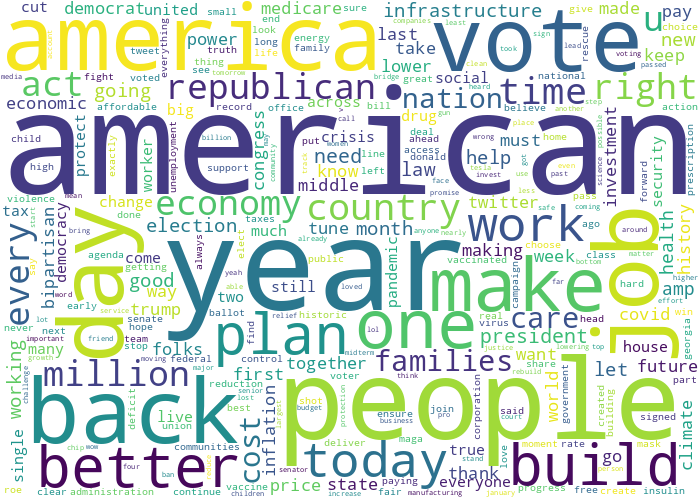

In [33]:
# Generating the text
text = ' '.join(text_clean)
# Creating a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generating a word cloud
wordcloud.generate(text)
# Visualizing the word cloud
wordcloud.to_image()

###Sentiment Analysis

In [34]:
for i in range(tweets_final.shape[0]):
  text=str(tweets_final['Tweets'][i])
  analysis = TextBlob(text)
  score= SentimentIntensityAnalyzer().polarity_scores(text)
  tweets_final.loc[i,'neg'] = score['neg']
  tweets_final.loc[i,'neu'] = score['neu']
  tweets_final.loc[i,'pos'] = score['pos']
  tweets_final.loc[i,'comp'] = score['compound']

In [35]:
tweets_final.head()

,Date Created,Tweets,neg,neu,pos,comp
0,2023-03-20 22:46:00+00:00,we are working every day to bring families mor...,0.044,0.840,0.116,0.5574
1,2023-03-20 19:03:05+00:00,i signed the american rescue plan to lower pri...,0.054,0.732,0.215,0.7650
2,2023-03-19 19:28:05+00:00,more than 12 million jobs have been created si...,0.105,0.775,0.120,0.1551
3,2023-03-19 15:51:00+00:00,we are focused on getting more people affordab...,0.000,0.804,0.196,0.8658
4,2023-03-18 22:00:50+00:00,the house freedom caucus and i have a very dif...,0.000,0.538,0.462,0.7832


In [36]:
tweets_final.to_csv("final.csv")

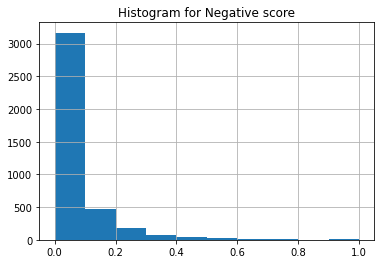

In [37]:
import matplotlib.pyplot as plt

plt.title("Histogram for Negative score")
tweets_final['neg'].hist()
plt.show()
# We can observe that the histogram is right skewed

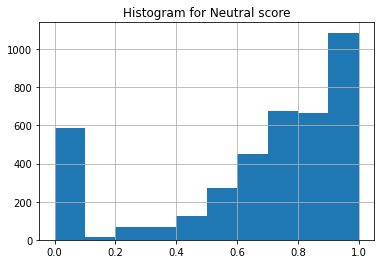

In [38]:
plt.title("Histogram for Neutral score")
tweets_final['neu'].hist()
plt.show()
#We can observe that the histogram is left skewed.

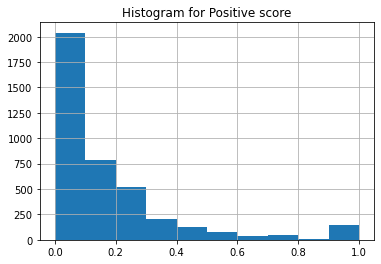

In [39]:
plt.title("Histogram for Positive score")
tweets_final['pos'].hist()
plt.show()
# We can observe that the histogram is right skewed

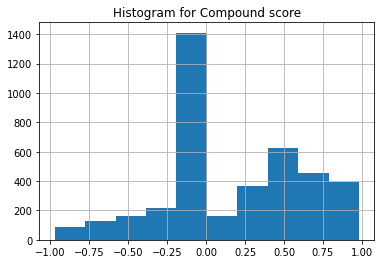

In [40]:
plt.title("Histogram for Compound score")
tweets_final['comp'].hist()
plt.show()
# We can observe that the histogram is skewed.

###Removing STOP words

In [41]:
# Loading stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [42]:
tweets_final.head()

,Date Created,Tweets,neg,neu,pos,comp
0,2023-03-20 22:46:00+00:00,we are working every day to bring families mor...,0.044,0.840,0.116,0.5574
1,2023-03-20 19:03:05+00:00,i signed the american rescue plan to lower pri...,0.054,0.732,0.215,0.7650
2,2023-03-19 19:28:05+00:00,more than 12 million jobs have been created si...,0.105,0.775,0.120,0.1551
3,2023-03-19 15:51:00+00:00,we are focused on getting more people affordab...,0.000,0.804,0.196,0.8658
4,2023-03-18 22:00:50+00:00,the house freedom caucus and i have a very dif...,0.000,0.538,0.462,0.7832


In [43]:
# 
tweets_final["Tweets"] = tweets_final['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])) 
tweets_final.head()

,Date Created,Tweets,neg,neu,pos,comp
0,2023-03-20 22:46:00+00:00,working every day bring families breathing roo...,0.044,0.840,0.116,0.5574
1,2023-03-20 19:03:05+00:00,signed american rescue plan lower prices incre...,0.054,0.732,0.215,0.7650
2,2023-03-19 19:28:05+00:00,12 million jobs created since took office cont...,0.105,0.775,0.120,0.1551
3,2023-03-19 15:51:00+00:00,focused getting people affordable health care ...,0.000,0.804,0.196,0.8658
4,2023-03-18 22:00:50+00:00,house freedom caucus different value set,0.000,0.538,0.462,0.7832


###Tokenizing the Tweets

In [44]:
tweets_final['Tweets'] = tweets_final.apply(lambda row: nltk.word_tokenize(row['Tweets']), axis=1)
tweets_final.head()

,Date Created,Tweets,neg,neu,pos,comp
0,2023-03-20 22:46:00+00:00,"[working, every, day, bring, families, breathi...",0.044,0.840,0.116,0.5574
1,2023-03-20 19:03:05+00:00,"[signed, american, rescue, plan, lower, prices...",0.054,0.732,0.215,0.7650
2,2023-03-19 19:28:05+00:00,"[12, million, jobs, created, since, took, offi...",0.105,0.775,0.120,0.1551
3,2023-03-19 15:51:00+00:00,"[focused, getting, people, affordable, health,...",0.000,0.804,0.196,0.8658
4,2023-03-18 22:00:50+00:00,"[house, freedom, caucus, different, value, set]",0.000,0.538,0.462,0.7832


###Lemmatizing the Tweets

In [45]:
nltk.download('omw-1.4')

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
tweets_final['lemmatized'] = tweets_final['Tweets'].apply(lambda x: [lm.lemmatize(y) for y in x])
tweets_final.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Date Created,Tweets,neg,neu,pos,comp,lemmatized
0,2023-03-20 22:46:00+00:00,"[working, every, day, bring, families, breathi...",0.044,0.840,0.116,0.5574,"[working, every, day, bring, family, breathing..."
1,2023-03-20 19:03:05+00:00,"[signed, american, rescue, plan, lower, prices...",0.054,0.732,0.215,0.7650,"[signed, american, rescue, plan, lower, price,..."
2,2023-03-19 19:28:05+00:00,"[12, million, jobs, created, since, took, offi...",0.105,0.775,0.120,0.1551,"[12, million, job, created, since, took, offic..."
3,2023-03-19 15:51:00+00:00,"[focused, getting, people, affordable, health,...",0.000,0.804,0.196,0.8658,"[focused, getting, people, affordable, health,..."
4,2023-03-18 22:00:50+00:00,"[house, freedom, caucus, different, value, set]",0.000,0.538,0.462,0.7832,"[house, freedom, caucus, different, value, set]"


In [46]:
# here's what it looked like before
tweets_final['lemmatized'].head()

0    [working, every, day, bring, family, breathing...
1    [signed, american, rescue, plan, lower, price,...
2    [12, million, job, created, since, took, offic...
3    [focused, getting, people, affordable, health,...
4      [house, freedom, caucus, different, value, set]
Name: lemmatized, dtype: object

In [47]:
def rejoin_words(row):
    my_list = row['lemmatized']
    joined_words = ( " ".join(my_list))
    return joined_words

tweets_final['lemmatized'] = tweets_final.apply(rejoin_words, axis=1)
# here it is after - no square brackets and commas!
tweets_final['lemmatized'].head()

0    working every day bring family breathing room ...
1    signed american rescue plan lower price increa...
2    12 million job created since took office conti...
3    focused getting people affordable health care ...
4             house freedom caucus different value set
Name: lemmatized, dtype: object

###Model-1A : CountVectorizer with Dense Neural Networks

In [48]:
# splitting into X and Y
X=pd.DataFrame(tweets_final['lemmatized'])
y=tweets_final[['neg','neu','pos','comp']]
print(X.shape,y.shape)

(4002, 1) (4002, 4)


Train-test split: Train 80% and Test 20%

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3201, 1) (3201, 4)
(801, 1) (801, 4)


Transforming X_train and X_test using CountVectorizer()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# getting rid of garbage text
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# creating an object for CountVectorizer
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1), # (1,1) is unigram, (1,2) is uni and bigram, (2,2) is just bigram
                     tokenizer = token.tokenize)

X_train = cv.fit_transform(X_train['lemmatized'])
X_test = cv.transform(X_test['lemmatized'])

print(X_train.shape)
print(X_test.shape)

(3201, 4955)
(801, 4955)


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Model Architecture

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.05))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(4, activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               495600    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 204       
                                                                 
Total params: 500,854
Trainable params: 500,854
Non-trainable params: 0
_________________________________________________________________


Early Stopping:

In [52]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=20,
                   restore_best_weights = True)

Compiling

In [53]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [54]:
X_train=pd.DataFrame.sparse.from_spmatrix(X_train)
X_test=pd.DataFrame.sparse.from_spmatrix(X_test)

Model Fitting

In [55]:
history1 = model.fit(X_train, y_train, 
                    epochs=40, 
                    batch_size=20,
                     callbacks=[es],
                    validation_split=0.2)

Epoch 1/40
128/128 [==============================] - 2s 10ms/step - loss: 0.0937 - mse: 0.0937 - val_loss: 0.0662 - val_mse: 0.0662
Epoch 2/40
128/128 [==============================] - 1s 8ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 3/40
128/128 [==============================] - 1s 7ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 4/40
128/128 [==============================] - 1s 8ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 5/40
128/128 [==============================] - 1s 7ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 6/40
128/128 [==============================] - 1s 8ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 7/40
128/128 [==============================] - 1s 8ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 8/40
128/128 [==============================] - 1s 7ms/step - loss: 0

Learning and Loss Curves

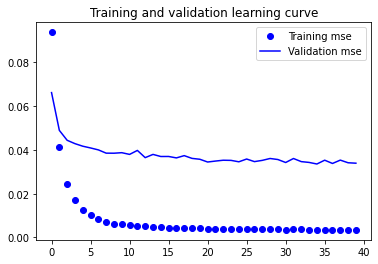

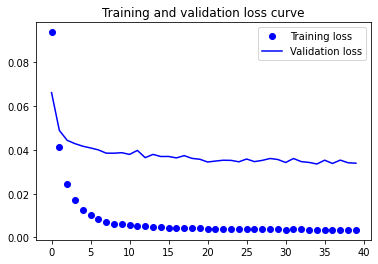

In [56]:
import matplotlib.pyplot as plt

mse = history1.history['mse']
val_mse = history1.history['val_mse']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(mse))

plt.plot(epochs, mse, 'bo', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation learning curve')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss curve')
plt.legend()

plt.show()

Prediction

In [57]:
pred_train=model.predict(X_train)
pred_train

101/101 [==============================] - 0s 3ms/step


array([[ 0.00237323,  0.08642071,  0.00272864, -0.00991389],
       [ 0.18149325,  0.5357988 ,  0.2566023 ,  0.7247839 ],
       [-0.01311279,  0.91031355,  0.11511632,  0.45752308],
       ...,
       [-0.01704609,  0.9377499 ,  0.03176237,  0.06049652],
       [ 0.00237323,  0.08642073,  0.00272866, -0.00991389],
       [ 0.04484844,  0.7129588 ,  0.20346281,  0.53723305]],
      dtype=float32)

In [58]:
pred_test=model.predict(X_test)
pred_test

26/26 [==============================] - 0s 3ms/step


array([[-0.00372288,  0.57163906,  0.06595476,  0.24022876],
       [ 0.04020403,  0.86324745,  0.03184873, -0.05038229],
       [ 0.00727435,  0.9968218 ,  0.00684225,  0.01604982],
       ...,
       [ 0.01480106,  0.37423784,  0.5399627 ,  0.7486841 ],
       [ 0.01079714,  0.85732573,  0.11501653,  0.2438752 ],
       [ 0.14825019,  0.6780802 ,  0.2070473 ,  0.03954773]],
      dtype=float32)

###Evaluation Metrics

###Target 1: Negative score

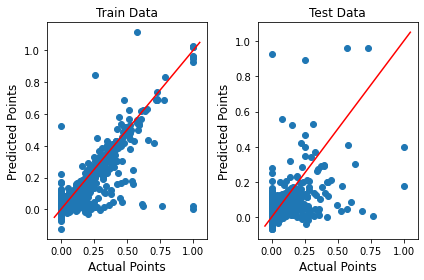

In [59]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 0 # 0 for negative sentiments
axes[0].scatter(x=y_train['neg'], y=pred_train[:,i]) # Train plots for negative sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neg'], y=pred_test[:,i])  # Test plots for negative sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i=0
print("For Train data:")
print('R Squared for negative sentiment:',r2_score(y_train['neg'],pred_train[:,i])) 
print('RMSE for negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],pred_train[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_train['neg'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for negative sentiment:',r2_score(y_test['neg'],pred_test[:,i])) 
print('rmse for negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],pred_test[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_test['neg'], pred_test[:,i]))

For Train data:
R Squared for negative sentiment: 0.818983644874222
RMSE for negative sentiment: 0.05222541646251107
MAE for negative sentiment: 0.019515107928607955


For Test data:
R Squared for negative sentiment: 0.20161198096877098
rmse for negative sentiment: 0.10821244459207062
MAE for negative sentiment: 0.053965233043412886


###Target 2: Neutral score

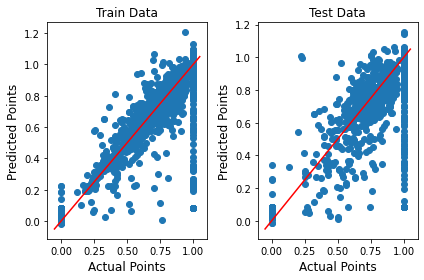

In [61]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 1 # 0 for neutral sentiments
axes[0].scatter(x=y_train['neu'], y=pred_train[:,i]) # Train plots for neutral sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neu'], y=pred_test[:,i])  # Test plots for neutral sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [62]:
i=1
print("For Train data:")
print('R Squared for neutral sentiment:',r2_score(y_train['neu'],pred_train[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],pred_train[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_train['neu'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for neutral sentiment:',r2_score(y_test['neu'],pred_test[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],pred_test[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_test['neu'], pred_test[:,i]))

For Train data:
R Squared for neutral sentiment: 0.8792932466202491
RMSE for neutral sentiment: 0.11469461101454763
MAE for neutral sentiment: 0.05412408104400194


For Test data:
R Squared for neutral sentiment: 0.5082806121246317
RMSE for neutral sentiment: 0.22082172477149034
MAE for neutral sentiment: 0.1391676366125302


###Target 3: Positive score

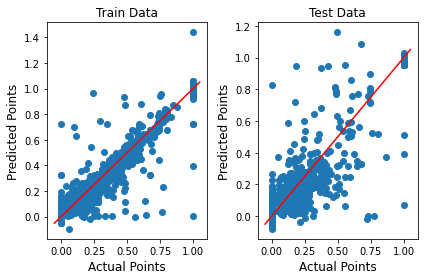

In [63]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 2 # 0 for positive sentiments
axes[0].scatter(x=y_train['pos'], y=pred_train[:,i]) # Train plots for positive sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['pos'], y=pred_test[:,i])  # Test plots for positive sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [64]:
i=2
print("For Train data:")
print('R Squared for positive sentiment:',r2_score(y_train['pos'],pred_train[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_train['pos'],pred_train[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_train['pos'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for positive sentiment:',r2_score(y_test['pos'],pred_test[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_test['pos'],pred_test[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_test['pos'], pred_test[:,i]))

For Train data:
R Squared for positive sentiment: 0.9305070449334883
RMSE for positive sentiment: 0.06093990914753391
MAE for positive sentiment: 0.0258461709904302


For Test data:
R Squared for positive sentiment: 0.6807269629739665
RMSE for positive sentiment: 0.13342722787072214
MAE for positive sentiment: 0.07602392877305342


###Target 4: Compound score

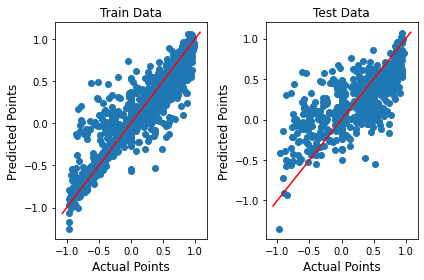

In [65]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 3 # 0 for compound sentiments
axes[0].scatter(x=y_train['comp'], y=pred_train[:,i]) # Train plots for compound sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['comp'], y=pred_test[:,i])  # Test plots for compound sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [66]:
i=3
print("For Train data:")
print('R Squared for compound sentiment:',r2_score(y_train['comp'],pred_train[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_train['comp'],pred_train[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_train['comp'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for comp sentiment:',r2_score(y_test['comp'],pred_test[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_test['comp'],pred_test[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_test['comp'], pred_test[:,i]))

For Train data:
R Squared for compound sentiment: 0.914928352208644
RMSE for comp sentiment: 0.12487239660581909
MAE for comp sentiment: 0.059521428167973546


For Test data:
R Squared for comp sentiment: 0.5613523232030897
RMSE for comp sentiment: 0.28311834033182237
MAE for comp sentiment: 0.19167692609065826


###Model-1B TF-IDF with Dense layers

###Splitting the data

In [67]:
# Splitting into X and Y
X=pd.DataFrame(tweets_final['lemmatized'])
y=tweets_final[['neg','neu','pos','comp']]
print(X.shape,y.shape)

(4002, 1) (4002, 4)


###Train-test split: Train 80%, Test 20%

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)

(3201, 1) (3201, 4)


###Transforming X_train and X_test using TfidfVectorizer()

In [69]:
# Creating the matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

X_train = tf.fit_transform(X_train['lemmatized'])
X_test = tf.transform(X_test['lemmatized'])

print(X_train.shape)
print(X_test.shape)

(3201, 5076)
(801, 5076)


Model Architecture

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               507700    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 404       
                                                                 
Total params: 518,204
Trainable params: 518,204
Non-trainable params: 0
_________________________________________________________________


Early stopping

In [71]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5,
                   restore_best_weights = True)

Compiling

In [72]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [73]:
X_train=pd.DataFrame.sparse.from_spmatrix(X_train)
X_test=pd.DataFrame.sparse.from_spmatrix(X_test)

Fitting Model

In [74]:
history2 = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=100,
                     callbacks=[es],
                    validation_split=0.2)

Epoch 1/10
26/26 [==============================] - 2s 37ms/step - loss: 0.1334 - mse: 0.1334 - val_loss: 0.0853 - val_mse: 0.0853
Epoch 2/10
26/26 [==============================] - 1s 27ms/step - loss: 0.0742 - mse: 0.0742 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 3/10
26/26 [==============================] - 1s 23ms/step - loss: 0.0506 - mse: 0.0506 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 4/10
26/26 [==============================] - 1s 22ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 5/10
26/26 [==============================] - 0s 17ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 6/10
26/26 [==============================] - 0s 16ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 7/10
26/26 [==============================] - 0s 15ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 8/10
26/26 [==============================] - 0s 14ms/step - loss: 0.0090 - m

Learning and Loss Curves

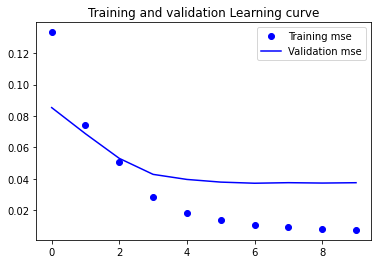

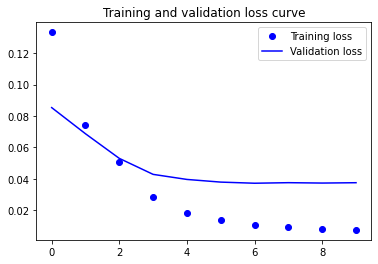

In [75]:
import matplotlib.pyplot as plt

mse = history2.history['mse']
val_mse = history2.history['val_mse']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(mse))

plt.plot(epochs, mse, 'bo', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation Learning curve')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss curve')
plt.legend()

plt.show()

Prediction

In [76]:
pred_train=model.predict(X_train)
pred_train

101/101 [==============================] - 0s 3ms/step


array([[-0.03940509,  0.9399464 ,  0.07335512,  0.34055254],
       [ 0.0145801 ,  0.84515035,  0.25019306,  0.9074195 ],
       [-0.00832842,  0.59063476,  0.32365155,  0.57602787],
       ...,
       [ 0.04708481,  0.78743094,  0.0551023 ,  0.17709532],
       [-0.01209688,  0.591967  ,  0.27578798,  0.45030797],
       [-0.01075411,  0.6593896 ,  0.17478895,  0.1590843 ]],
      dtype=float32)

In [77]:
pred_test=model.predict(X_test)
pred_test

26/26 [==============================] - 0s 3ms/step


array([[ 1.2497274e-01,  4.8150975e-01,  1.2398857e-01, -2.4618226e-01],
       [ 1.4590628e-02,  9.2631161e-01,  1.3632229e-01,  4.5116222e-01],
       [ 5.1141448e-02,  9.3298472e-02,  4.5865335e-02, -8.7748375e-04],
       ...,
       [ 1.7470799e-02,  9.8116970e-01,  8.2042404e-03,  6.8939708e-02],
       [ 9.7547472e-03, -2.7022002e-02,  9.7705460e-01,  5.6518173e-01],
       [ 6.8574980e-02,  5.0808281e-01,  2.3506700e-01,  3.8274434e-01]],
      dtype=float32)

Evaluation Metrics

###Target 1: Negative score

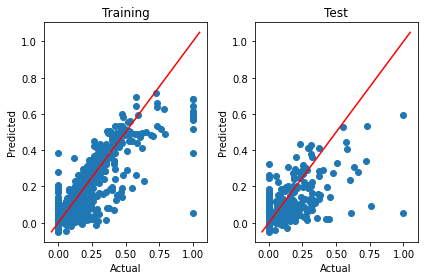

In [78]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 0
axes[0].scatter(x=y_train['neg'], y=pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# adding 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['neg'], y=pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# adding 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# showing the plot
plt.show()

In [79]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 0
print("For Train data:")
print('R2 for negative sentiment:',r2_score(y_train['neg'],pred_train[:,i])) 
print('rmse for negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],pred_train[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_train['neg'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R2 for negative sentiment:',r2_score(y_test['neg'],pred_test[:,i])) 
print('rmse for negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],pred_test[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_test['neg'], pred_test[:,i]))

For Train data:
R2 for negative sentiment: 0.7763390326569133
rmse for negative sentiment: 0.05796844342817976
MAE for negative sentiment: 0.034538313277200756


For Test data:
R2 for negative sentiment: 0.43784098193203913
rmse for negative sentiment: 0.09133764451802759
MAE for negative sentiment: 0.05527660007520896


### Target 2: Neutral score

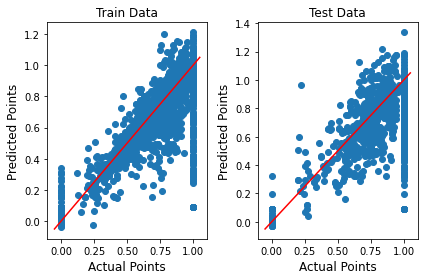

In [80]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 1 # 0 for neutral sentiments
axes[0].scatter(x=y_train['neu'], y=pred_train[:,i]) # Train plots for neutral sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neu'], y=pred_test[:,i])  # Test plots for neutral sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [81]:
i=1
print("For Train data:")
print('R Squared for neutral sentiment:',r2_score(y_train['neu'],pred_train[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],pred_train[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_train['neu'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for neutral sentiment:',r2_score(y_test['neu'],pred_test[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],pred_test[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_test['neu'], pred_test[:,i]))

For Train data:
R Squared for neutral sentiment: 0.844519717155695
RMSE for neutral sentiment: 0.12895351544998976
MAE for neutral sentiment: 0.07812931106606617


For Test data:
R Squared for neutral sentiment: 0.5524763174103912
RMSE for neutral sentiment: 0.2191149492075184
MAE for neutral sentiment: 0.15620286302794975


###Target 3: Positive score

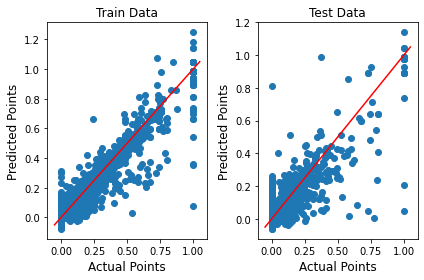

In [82]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 2 # 0 for positive sentiments
axes[0].scatter(x=y_train['pos'], y=pred_train[:,i]) # Train plots for positive sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['pos'], y=pred_test[:,i])  # Test plots for positive sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [83]:
i=2
print("For Train data:")
print('R Squared for positive sentiment:',r2_score(y_train['pos'],pred_train[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_train['pos'],pred_train[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_train['pos'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for positive sentiment:',r2_score(y_test['pos'],pred_test[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_test['pos'],pred_test[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_test['pos'], pred_test[:,i]))

For Train data:
R Squared for positive sentiment: 0.9244603736562038
RMSE for positive sentiment: 0.06428709245320668
MAE for positive sentiment: 0.039293756266895845


For Test data:
R Squared for positive sentiment: 0.7255814895383714
RMSE for positive sentiment: 0.11796230990178505
MAE for positive sentiment: 0.072853827804327


###Target 4: Compound score

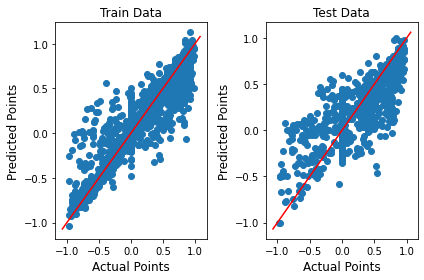

In [84]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 3 # 0 for compound sentiments
axes[0].scatter(x=y_train['comp'], y=pred_train[:,i]) # Train plots for compound sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['comp'], y=pred_test[:,i])  # Test plots for compound sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [85]:
i=3
print("For Train data:")
print('R Squared for compound sentiment:',r2_score(y_train['comp'],pred_train[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_train['comp'],pred_train[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_train['comp'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for comp sentiment:',r2_score(y_test['comp'],pred_test[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_test['comp'],pred_test[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_test['comp'], pred_test[:,i]))

For Train data:
R Squared for compound sentiment: 0.9009383900623504
RMSE for comp sentiment: 0.1346176678401159
MAE for comp sentiment: 0.07171279012451076


For Test data:
R Squared for comp sentiment: 0.5858186271313879
RMSE for comp sentiment: 0.2760074968769752
MAE for comp sentiment: 0.19349725968270529


### Model 2: Flattened Word Embeddings with Dense Neural Network (pre-trained)

Splitting the data

In [86]:
# splitting into X and Y
X=pd.DataFrame(tweets_final['lemmatized'])
y=tweets_final[['neg','neu','pos','comp']]
print(X.shape,y.shape)

(4002, 1) (4002, 4)


Train-test split: Train 80% and Test 20%

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [88]:
print(X.shape) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4002, 1)
(3201, 1) (3201, 4)
(801, 1) (801, 4)


Pre-processing the data 

In [89]:
token = Tokenizer()
token.fit_on_texts(X_train['lemmatized'])
seq = token.texts_to_sequences(X_train['lemmatized']) # Converting texts to sequences

In [96]:
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
pad_seq_train = pad_sequences(seq,maxlen=300) # Padding the sequences

In [97]:
pad_seq_train.shape

(3201, 300)

In [98]:
vocab_size = len(token.word_index)+1
vocab_size

5110

Downloading the Glove Word Embedding

In [99]:
import os # Downloading and unzipping glove word embeddings from opensource
!pip install wget
import wget # Using wget library to download 
wget.download('https://nlp.stanford.edu/data/glove.6B.zip') # Downloading the zip file
# os.mkdir('/content/glove_unzip')
from zipfile import ZipFile
ZipFile("/content/glove.6B.zip").extractall("/content/glove_unzip") # Extracting files
embeddings_index = {}
f = open('/content/glove_unzip/glove.6B.300d.txt') # File path 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs # Adding coefficients to the dictionary as word index pair
f.close()

print(f'Found {len(embeddings_index)} word vectors.')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=2571c9c7c0ced9aae336f735fe0d6f42dfa201fd2ff3bba6d2619d6543d0263e
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
Found 400000 word vectors.


Creating Embedding matrix

In [100]:
embedding_dim = 300 # this is the dimension of the file we imported
max_words=10000
maxlen=300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in token.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeroes.
            embedding_matrix[i] = embedding_vector

###Model Architecture

In [101]:
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          3000000   
                                                                 
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                2880032   
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                660       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 4)                

In [102]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Early Stopping

In [103]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5,
                   restore_best_weights = True)

Compiling

In [104]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

Fitting Model

In [105]:
history3 = model.fit(pad_seq_train, y_train, 
                    epochs=30, 
                    batch_size=100,
                    callbacks=[es],
                    validation_split=0.2)

Epoch 1/30
26/26 [==============================] - 4s 115ms/step - loss: 0.1492 - mse: 0.1492 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 2/30
26/26 [==============================] - 5s 196ms/step - loss: 0.1324 - mse: 0.1324 - val_loss: 0.0770 - val_mse: 0.0770
Epoch 3/30
26/26 [==============================] - 4s 174ms/step - loss: 0.1085 - mse: 0.1085 - val_loss: 0.0712 - val_mse: 0.0712
Epoch 4/30
26/26 [==============================] - 4s 141ms/step - loss: 0.0971 - mse: 0.0971 - val_loss: 0.0685 - val_mse: 0.0685
Epoch 5/30
26/26 [==============================] - 5s 190ms/step - loss: 0.0819 - mse: 0.0819 - val_loss: 0.0669 - val_mse: 0.0669
Epoch 6/30
26/26 [==============================] - 4s 160ms/step - loss: 0.0731 - mse: 0.0731 - val_loss: 0.0656 - val_mse: 0.0656
Epoch 7/30
26/26 [==============================] - 4s 172ms/step - loss: 0.0719 - mse: 0.0719 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 8/30
26/26 [==============================] - 5s 214ms/step - loss: 0.

Learning ang Loss Curves

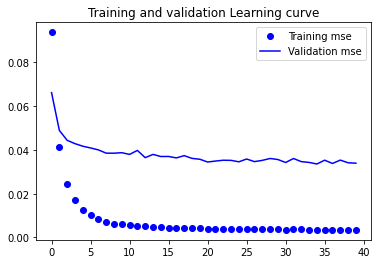

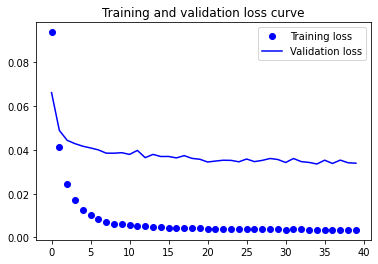

In [106]:
import matplotlib.pyplot as plt

mse = history1.history['mse']
val_mse = history1.history['val_mse']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(mse))

plt.plot(epochs, mse, 'bo', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation Learning curve')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss curve')
plt.legend()

plt.show()

Prediction

In [107]:
pred_train=model.predict(pad_seq_train)
pred_train

101/101 [==============================] - 2s 13ms/step


array([[ 0.04610782,  0.4549663 ,  0.08874585,  0.10088689],
       [ 0.01154428,  0.8300116 ,  0.02992013,  0.05682939],
       [ 0.05180608,  0.52697694,  0.09899108,  0.11919592],
       ...,
       [ 0.07219501,  0.7969041 ,  0.06406762,  0.02524514],
       [ 0.01747901,  0.805684  ,  0.01031228, -0.00095679],
       [ 0.07738478,  0.617555  ,  0.0791997 , -0.15000336]],
      dtype=float32)

In [109]:
token = Tokenizer()
token.fit_on_texts(X_test['lemmatized'])
seq = token.texts_to_sequences(X_test['lemmatized'])
#from keras_preprocessing.sequence import pad_sequences
pad_seq_test = pad_sequences(seq,maxlen=300)

In [110]:
pred_test=model.predict(pad_seq_test)
pred_test

26/26 [==============================] - 0s 9ms/step


array([[0.02182987, 0.65057844, 0.10249238, 0.11054556],
       [0.04610782, 0.4549663 , 0.08874585, 0.10088689],
       [0.04967198, 0.5019456 , 0.09237087, 0.11284488],
       ...,
       [0.04610782, 0.4549663 , 0.08874585, 0.10088689],
       [0.04725003, 0.57037234, 0.16955073, 0.38382697],
       [0.10611915, 0.631176  , 0.10462168, 0.07323663]], dtype=float32)

Evalaution Metrics

###Target 1: Negative score

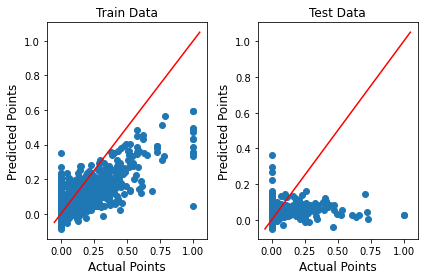

In [111]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 0 # 0 for negative sentiments
axes[0].scatter(x=y_train['neg'], y=pred_train[:,i]) # Train plots for negative sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neg'], y=pred_test[:,i])  # Test plots for negative sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [112]:
i=0
print("For Train data:")
print('R Squared for negative sentiment:',r2_score(y_train['neg'],pred_train[:,i])) 
print('RMSE for negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],pred_train[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_train['neg'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for negative sentiment:',r2_score(y_test['neg'],pred_test[:,i])) 
print('rmse for negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],pred_test[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_test['neg'], pred_test[:,i]))

For Train data:
R Squared for negative sentiment: 0.4862287849836969
RMSE for negative sentiment: 0.08857925810501413
MAE for negative sentiment: 0.06069523470171706


For Test data:
R Squared for negative sentiment: -0.07826612948781064
rmse for negative sentiment: 0.12223218538749075
MAE for negative sentiment: 0.07754933055174931


###Target 2: Neutral score

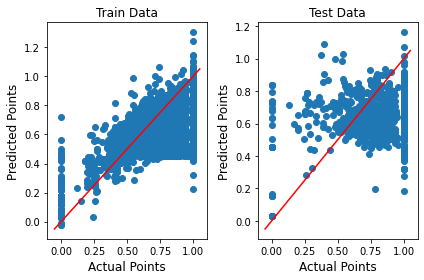

In [113]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 1 # 0 for neutral sentiments
axes[0].scatter(x=y_train['neu'], y=pred_train[:,i]) # Train plots for neutral sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neu'], y=pred_test[:,i])  # Test plots for neutral sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [114]:
i=1
print("For Train data:")
print('R Squared for neutral sentiment:',r2_score(y_train['neu'],pred_train[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],pred_train[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_train['neu'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for neutral sentiment:',r2_score(y_test['neu'],pred_test[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],pred_test[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_test['neu'], pred_test[:,i]))

For Train data:
R Squared for neutral sentiment: 0.5344752122031469
RMSE for neutral sentiment: 0.22412285141589802
MAE for neutral sentiment: 0.1748176830324744


For Test data:
R Squared for neutral sentiment: 0.05196731248548525
RMSE for neutral sentiment: 0.31290388939645614
MAE for neutral sentiment: 0.2603572321694144


###Target 3: Positive score

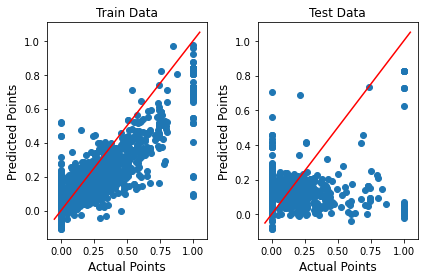

In [115]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 2 # 0 for positive sentiments
axes[0].scatter(x=y_train['pos'], y=pred_train[:,i]) # Train plots for positive sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['pos'], y=pred_test[:,i])  # Test plots for positive sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [116]:
i=2
print("For Train data:")
print('R Squared for positive sentiment:',r2_score(y_train['pos'],pred_train[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_train['pos'],pred_train[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_train['pos'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for positive sentiment:',r2_score(y_test['pos'],pred_test[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_test['pos'],pred_test[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_test['pos'], pred_test[:,i]))

For Train data:
R Squared for positive sentiment: 0.7530644135898066
RMSE for positive sentiment: 0.11600166861088587
MAE for positive sentiment: 0.08172350454249444


For Test data:
R Squared for positive sentiment: -0.023205804536268637
RMSE for positive sentiment: 0.22983262624205147
MAE for positive sentiment: 0.1500310580106859


###Target 4: Compound score

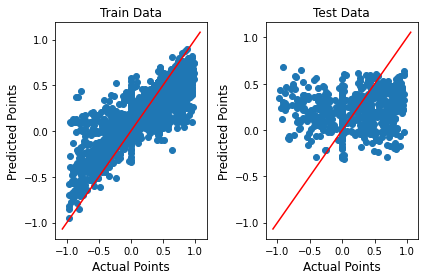

In [117]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 3 # 0 for compound sentiments
axes[0].scatter(x=y_train['comp'], y=pred_train[:,i]) # Train plots for compound sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['comp'], y=pred_test[:,i])  # Test plots for compound sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [118]:
i=3
print("For Train data:")
print('R Squared for compound sentiment:',r2_score(y_train['comp'],pred_train[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_train['comp'],pred_train[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_train['comp'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for comp sentiment:',r2_score(y_test['comp'],pred_test[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_test['comp'],pred_test[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_test['comp'], pred_test[:,i]))

For Train data:
R Squared for compound sentiment: 0.6999520373542187
RMSE for comp sentiment: 0.23359540403003512
MAE for comp sentiment: 0.16947980098765328


For Test data:
R Squared for comp sentiment: -0.08330219724145183
RMSE for comp sentiment: 0.45167997601071835
MAE for comp sentiment: 0.350642117174139


###3. Deep Learning Model

Splitting the data

In [119]:
# splitting into X and Y
X=pd.DataFrame(tweets_final['lemmatized'])
y=tweets_final[['neg','neu','pos','comp']]
print(X.shape,y.shape)

(4002, 1) (4002, 4)


Train-Test split: Train 80% teat 20%

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
print(X.shape) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4002, 1)
(3201, 1) (3201, 4)
(801, 1) (801, 4)


Pre-processing the data

In [122]:
token = Tokenizer()
token.fit_on_texts(X_train['lemmatized'])
seq = token.texts_to_sequences(X_train['lemmatized']) # Converting text to sequences

In [124]:
#from keras_preprocessing.sequence import pad_sequences
pad_seq_train = pad_sequences(seq,maxlen=300) # padding the sequences

In [125]:
pad_seq_train.shape

(3201, 300)

In [126]:
vocab_size = len(token.word_index)+1
vocab_size

5138

Model Architecture

In [127]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

from keras.layers import Conv1D, MaxPooling1D, Bidirectional, GRU
# define model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(MaxPooling1D(2))
model.add(GRU(25, activation='linear',return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(20, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(15, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='linear'))
model.summary()
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 300)          3000000   
                                                                 
 conv1d (Conv1D)             (None, 298, 64)           57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 149, 64)          0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 149, 25)           6825      
                                                                 
 dropout_6 (Dropout)         (None, 149, 25)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 149, 20)           920       
                                                      

Early stopping

In [128]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=4,
                   restore_best_weights = True)

Compiling

In [129]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

###Model Fitting

In [130]:
history3 = model.fit(pad_seq_train, y_train, 
                    epochs=12, 
                    batch_size=35,
                     callbacks=[es],
                    validation_split=0.2)

Epoch 1/12
74/74 [==============================] - 31s 317ms/step - loss: 0.2306 - mse: 0.2306 - val_loss: 0.1329 - val_mse: 0.1329
Epoch 2/12
74/74 [==============================] - 17s 222ms/step - loss: 0.1379 - mse: 0.1379 - val_loss: 0.1017 - val_mse: 0.1017
Epoch 3/12
74/74 [==============================] - 17s 226ms/step - loss: 0.1151 - mse: 0.1151 - val_loss: 0.0883 - val_mse: 0.0883
Epoch 4/12
74/74 [==============================] - 17s 228ms/step - loss: 0.1041 - mse: 0.1041 - val_loss: 0.0844 - val_mse: 0.0844
Epoch 5/12
74/74 [==============================] - 16s 223ms/step - loss: 0.0977 - mse: 0.0977 - val_loss: 0.0814 - val_mse: 0.0814
Epoch 6/12
74/74 [==============================] - 17s 224ms/step - loss: 0.0932 - mse: 0.0932 - val_loss: 0.0784 - val_mse: 0.0784
Epoch 7/12
74/74 [==============================] - 17s 230ms/step - loss: 0.0899 - mse: 0.0899 - val_loss: 0.0787 - val_mse: 0.0787
Epoch 8/12
74/74 [==============================] - 17s 237ms/step - 

Learning and Loss Curves

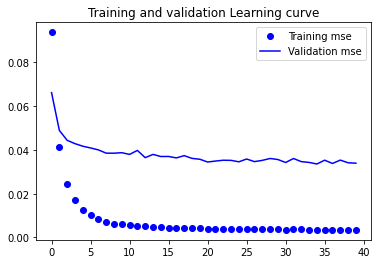

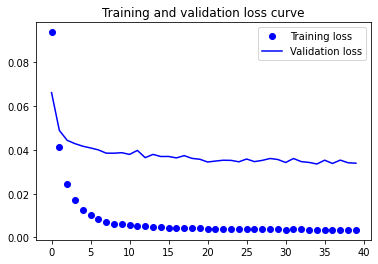

In [131]:
import matplotlib.pyplot as plt

mse = history1.history['mse']
val_mse = history1.history['val_mse']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(mse))

plt.plot(epochs, mse, 'bo', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation Learning curve')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss curve')
plt.legend()

plt.show()

Prediction

In [132]:
pred_train=model.predict(pad_seq_train)
pred_train

101/101 [==============================] - 6s 60ms/step


array([[ 0.07864657,  0.6694031 ,  0.1446967 ,  0.1522773 ],
       [ 0.05797476,  0.6924054 ,  0.15699922,  0.20682733],
       [ 0.11648069,  0.32339302,  0.27487594, -0.0035559 ],
       ...,
       [ 0.06794863,  0.6362795 ,  0.15062004,  0.17143257],
       [ 0.07185046,  0.6826565 ,  0.1499123 ,  0.13080531],
       [ 0.0603585 ,  0.6462154 ,  0.15491933,  0.20022023]],
      dtype=float32)

In [134]:
token = Tokenizer()
token.fit_on_texts(X_test['lemmatized'])
seq = token.texts_to_sequences(X_test['lemmatized'])
#from keras_preprocessing.sequence import pad_sequences
pad_seq_test = pad_sequences(seq,maxlen=300)

In [135]:
pred_test=model.predict(pad_seq_test)
pred_test

26/26 [==============================] - 1s 52ms/step


array([[0.06663131, 0.6491498 , 0.15151048, 0.17741995],
       [0.05773164, 0.4102019 , 0.18939042, 0.05360798],
       [0.03462632, 0.5875051 , 0.18922243, 0.117295  ],
       ...,
       [0.03272846, 0.24611852, 0.2210682 , 0.01459153],
       [0.03272846, 0.24611852, 0.2210682 , 0.01459153],
       [0.06358161, 0.61267734, 0.15369602, 0.14967793]], dtype=float32)

Evaluation Metrics

###Target 1: Negative score

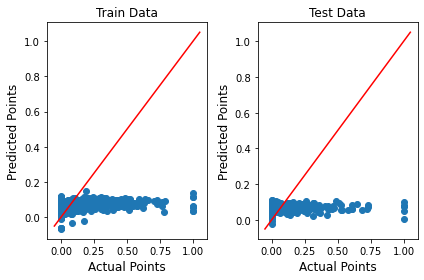

In [136]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 0 # 0 for negative sentiments
axes[0].scatter(x=y_train['neg'], y=pred_train[:,i]) # Train plots for negative sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neg'], y=pred_test[:,i])  # Test plots for negative sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [137]:
i=0
print("For Train data:")
print('R Squared for negative sentiment:',r2_score(y_train['neg'],pred_train[:,i])) 
print('RMSE for negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],pred_train[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_train['neg'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for negative sentiment:',r2_score(y_test['neg'],pred_test[:,i])) 
print('rmse for negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],pred_test[:,i]))) 
print('MAE for negative sentiment:',mean_absolute_error(y_test['neg'], pred_test[:,i]))

For Train data:
R Squared for negative sentiment: 0.08727323258628705
RMSE for negative sentiment: 0.11237330315723516
MAE for negative sentiment: 0.07279719530089279


For Test data:
R Squared for negative sentiment: 0.017011032217016053
rmse for negative sentiment: 0.13875215323528195
MAE for negative sentiment: 0.08386833709069107


###Target 2: Neutral score

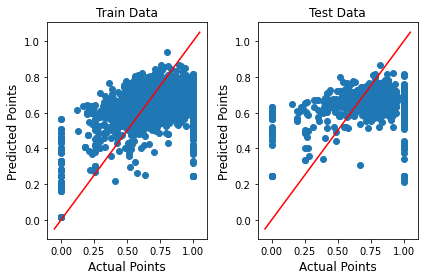

In [138]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 1 # 0 for neutral sentiments
axes[0].scatter(x=y_train['neu'], y=pred_train[:,i]) # Train plots for neutral sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['neu'], y=pred_test[:,i])  # Test plots for neutral sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [139]:
i=1
print("For Train data:")
print('R Squared for neutral sentiment:',r2_score(y_train['neu'],pred_train[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],pred_train[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_train['neu'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for neutral sentiment:',r2_score(y_test['neu'],pred_test[:,i])) 
print('RMSE for neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],pred_test[:,i]))) 
print('MAE for neutral sentiment:',mean_absolute_error(y_test['neu'], pred_test[:,i]))

For Train data:
R Squared for neutral sentiment: 0.48462764836925987
RMSE for neutral sentiment: 0.23199343274029308
MAE for neutral sentiment: 0.19442127743258175


For Test data:
R Squared for neutral sentiment: 0.3812621050248024
RMSE for neutral sentiment: 0.2686503666342759
MAE for neutral sentiment: 0.22246237438061411


###Target 3: Positive score

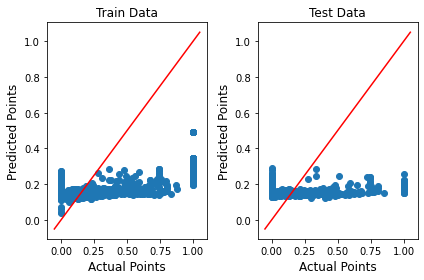

In [140]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 2 # 0 for positive sentiments
axes[0].scatter(x=y_train['pos'], y=pred_train[:,i]) # Train plots for positive sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['pos'], y=pred_test[:,i])  # Test plots for positive sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [141]:
i=2
print("For Train data:")
print('R Squared for positive sentiment:',r2_score(y_train['pos'],pred_train[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_train['pos'],pred_train[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_train['pos'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for positive sentiment:',r2_score(y_test['pos'],pred_test[:,i])) 
print('RMSE for positive sentiment:',np.sqrt(mean_squared_error(y_test['pos'],pred_test[:,i]))) 
print('MAE for positive sentiment:',mean_absolute_error(y_test['pos'], pred_test[:,i]))

For Train data:
R Squared for positive sentiment: 0.13107650127905468
RMSE for positive sentiment: 0.21516918689016717
MAE for positive sentiment: 0.15781221101735393


For Test data:
R Squared for positive sentiment: -0.020002068381866023
RMSE for positive sentiment: 0.2400483191385393
MAE for positive sentiment: 0.17464902292722176


###Target 4: Compound score

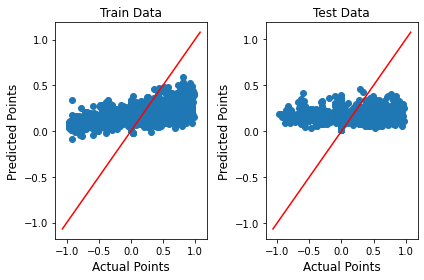

In [142]:
fig, axes = plt.subplots(1,2) # subplots with 1 row and 2 columns
i = 3 # 0 for compound sentiments
axes[0].scatter(x=y_train['comp'], y=pred_train[:,i]) # Train plots for compound sentiment
axes[0].set_xlabel("Actual Points", fontsize=12)
axes[0].set_ylabel("Predicted Points",  fontsize=12)
axes[0].set_title("Train Data")
x = np.linspace(*axes[0].get_xlim()) 
axes[0].plot(x, x, color='red') # plotting 45 degree line for comparison


axes[1].scatter(x=y_test['comp'], y=pred_test[:,i])  # Test plots for compound sentiment
axes[1].set_xlabel("Actual Points", fontsize=12)
axes[1].set_ylabel("Predicted Points",  fontsize=12)
axes[1].set_title("Test Data")
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red') # plotting 45 degree line for comparison


fig.tight_layout()
plt.show() # Displaying the plot

In [143]:
i=3
print("For Train data:")
print('R Squared for compound sentiment:',r2_score(y_train['comp'],pred_train[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_train['comp'],pred_train[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_train['comp'], pred_train[:,i]))
print("\n")
print("For Test data:")
print('R Squared for comp sentiment:',r2_score(y_test['comp'],pred_test[:,i])) 
print('RMSE for comp sentiment:',np.sqrt(mean_squared_error(y_test['comp'],pred_test[:,i]))) 
print('MAE for comp sentiment:',mean_absolute_error(y_test['comp'], pred_test[:,i]))

For Train data:
R Squared for compound sentiment: 0.21549326561415827
RMSE for comp sentiment: 0.3791756060443323
MAE for comp sentiment: 0.29942970597930196


For Test data:
R Squared for comp sentiment: 0.027449305759985942
RMSE for comp sentiment: 0.42169787745733794
MAE for comp sentiment: 0.3265973496579313


### **Evaluation Metrics**

* RMSE

\begin{array}{|c|c|} \hline
Target & CountVectorizer() & TfidfVectorizer() & Word Embeddings & Advanced DL \\ \hline
negative & 0.102 & 0.09 & 0.116 & 0.114 \\ \hline
neutral & 0.22 & 0.224 & 0.265 & 0.224 \\\hline
positive & 0.136 & 0.116 & 0.238 & 0.203 \\ \hline
compound & 0.278 & 0.228 & 0.456 & 0.43 \\ \hline
\end{array}

* MAE

\begin{array}{|c|c|} \hline
Target & CountVectorizer() & TfidfVectorizer() & Word Embeddings & Advanced DL \\ \hline
negative & 0.053 & 0.05 & 0.075 & 0.069 \\ \hline
neutral & 0.138 & 0.163 & 0.201 & 0.192 \\\hline
positive & 0.073 & 0.079 & 0.149 & 0.146 \\ \hline
compound & 0.191 & 0.202 & 0.346 & 0.33 \\ \hline
\end{array}
 



* Upon examining the RMSE and MAE values for the test data, it is evident that both CountVectorizer() and TfidfVectorizer() produce similar results

* Out of the four models considered, CountVectorizer() and TfidfVectorizer() are the most effective, as they exhibit lower RMSE and MAE values along with high R-squared values.

* Moreover, these models demonstrate higher accuracy in predicting the Negative and Positive scores, compared to the Neutral and Compound scores.

* Adjusting the hyperparameters did provide some improvement, but it was not as significant as we had hoped.

### **Analysis**

* Regarding the architecture, we have observed some enhancements after making changes. Specifically, increasing the number of layers has led to improved performance, although not to a significant extent

* Adding dropouts after the neural network layers resulted in a slight increase in the R-squared value, although not as much as anticipated. Even though overfitting remained a concern, these adjustments were still beneficial. Additionally, improvements were observed after decreasing the patience value, reducing the batch size, and limiting the batch size.

* Due to the small size of the dataset, the addition of SimpleRNN layers to the model architecture resulted in a slight improvement.

* The primary challenge we face is the limited size of our dataset, which only contains 4,000 tweets. However, the model's performance improved slightly when the data size is increased from 2,000 to 4,000 tweets. Therefore, increasing the dataset significantly could lead to improved model performance in accurately capturing sentiments.

* It can be concluded that Deep Learning Models are capable of replicating the logic of the nltk SentimentIntensityAnalyzer() for positive and negative scores.